# OLA 1
## By group H (Caroline, Michael & Maria) 

## Task 1: Data Exploration and Cleaning

##### Task 1.1 
We have chosen to work with a dataset of the top 1000 ranked channels on YouTube based on subscriber count.

##### Task 1.2

In [41]:
import pandas as pd

In [2]:
data = pd.read_csv("Youtuber.csv")
df = pd.DataFrame(data)

In [3]:
data.head()

,Rank,Channel Name,Category,Subscribers,Country,Average Views,Average Likes,Average Comments,Content Type
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,T-Series,Music & Dance,258.4M,India,135.2K,5.6K,223,NaN
2,2.0,MrBeast,Video games,236.1M,United States,104M,4M,74K,Humor
3,3.0,Cocomelon - Nursery Rhymes,Education,171.4M,NaN,5.1M,57.1K,0,NaN
4,4.0,SET India,NaN,167.1M,India,27.9K,996,7,NaN


In our dataset the first column has been left empty for styling purposes, therefore we have chosen to remove that column.

In [4]:
df = df.drop([0])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1046 entries, 0 to 1045
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rank              1045 non-null   float64
 1   Channel Name      1045 non-null   object 
 2   Category          695 non-null    object 
 3   Subscribers       1045 non-null   object 
 4   Country           853 non-null    object 
 5   Average Views     1045 non-null   object 
 6   Average Likes     1045 non-null   object 
 7   Average Comments  1045 non-null   object 
 8   Content Type      335 non-null    object 
dtypes: float64(1), object(8)
memory usage: 73.7+ KB


In [6]:
df.describe()

,Rank
count,1045.000000
mean,521.055502
std,298.709262
min,1.000000
25%,262.000000
50%,523.000000
75%,784.000000
max,1000.000000


Right now, the only column in our dataset with numerical data is the column 'Rank'. We will clean the data in the following and tasks and after (in Task 1.4), we will return to see, what information we can get from ```df.describe()```

##### Task 1.3

In [7]:
#Identify columns with missing values
null_mask = df.isnull().any(axis=1)
rows_with_null_any = df[null_mask]
rows_with_null_any

,Rank,Channel Name,Category,Subscribers,Country,Average Views,Average Likes,Average Comments,Content Type
1,1.0,T-Series,Music & Dance,258.4M,India,135.2K,5.6K,223,NaN
3,3.0,Cocomelon - Nursery Rhymes,Education,171.4M,NaN,5.1M,57.1K,0,NaN
4,4.0,SET India,NaN,167.1M,India,27.9K,996,7,NaN
5,5.0,✿ Kids Diana Show,Animation,118.5M,NaN,5.1M,14.3K,0,Toys
6,6.0,Like Nastya,Toys,112.6M,NaN,3.4M,45.9K,0,NaN
...,...,...,...,...,...,...,...,...,...
1040,995.0,Little Baby Bum en Español,NaN,12.6M,NaN,21K,45,0,NaN
1041,996.0,BBC Earth,NaN,12.5M,United States,80.3K,1.7K,79,NaN
1043,998.0,janin al chair,NaN,12.5M,Mexico,1.4M,146.1K,485,NaN
1044,999.0,Myke Towers,Music & Dance,12.5M,Colombia,8.3K,485,8,NaN


When we were looking at the dataset trying to see which columns contained the most missing values, we noticed something strange in the dataset. It is supposed to contain the top 1000 youtubers, but for some reason there are 1045 rows in the dataset. We suspected that there would be some duplicates, so we looked at it further.

In [8]:
duplicated_rows = df[df.duplicated(subset='Rank', keep=False)]
duplicated_rows

,Rank,Channel Name,Category,Subscribers,Country,Average Views,Average Likes,Average Comments,Content Type
952,952.0,Timba Vk,Animation,12.8M,Mexico,1.3M,29.5K,703,Video games
954,954.0,Heidi and Zidane Kids Fun,Animation,12.8M,NaN,61.5K,1K,0,Toys
958,958.0,#Refúgio Mental,Movies,12.8M,Brazil,266.4K,4.7K,96,Animation
959,959.0,Ellie Goulding,Music & Dance,12.8M,United States,39.4K,2.1K,162,NaN
960,960.0,YoSoyPlex,Movies,12.8M,Spain,2.1M,120.6K,5.9K,Video games
...,...,...,...,...,...,...,...,...,...
1041,996.0,BBC Earth,NaN,12.5M,United States,80.3K,1.7K,79,NaN
1042,997.0,Jamie Nyland,Animation,12.5M,United States,66.7K,2.5K,104,Humor
1043,998.0,janin al chair,NaN,12.5M,Mexico,1.4M,146.1K,485,NaN
1044,999.0,Myke Towers,Music & Dance,12.5M,Colombia,8.3K,485,8,NaN


We found out which rows were duplicated, which were some youtubers ranked from 952 to 1000. Since we didn’t want redundant data, we removed the duplicates. 

In [9]:
duplicated_rows = df.loc[df.duplicated(subset='Rank', keep=False),'Rank'].unique()
duplicated_rows

array([ 952.,  954.,  958.,  959.,  960.,  961.,  962.,  963.,  964.,
        965.,  966.,  967.,  968.,  969.,  970.,  971.,  972.,  973.,
        974.,  975.,  976.,  977.,  978.,  979.,  980.,  981.,  982.,
        983.,  984.,  985.,  986.,  987.,  988.,  989.,  990.,  991.,
        992.,  993.,  994.,  995.,  996.,  997.,  998.,  999., 1000.])

In [10]:
df_unique = df.drop_duplicates(subset='Rank', keep='first')
df_unique

,Rank,Channel Name,Category,Subscribers,Country,Average Views,Average Likes,Average Comments,Content Type
1,1.0,T-Series,Music & Dance,258.4M,India,135.2K,5.6K,223,NaN
2,2.0,MrBeast,Video games,236.1M,United States,104M,4M,74K,Humor
3,3.0,Cocomelon - Nursery Rhymes,Education,171.4M,NaN,5.1M,57.1K,0,NaN
4,4.0,SET India,NaN,167.1M,India,27.9K,996,7,NaN
5,5.0,✿ Kids Diana Show,Animation,118.5M,NaN,5.1M,14.3K,0,Toys
...,...,...,...,...,...,...,...,...,...
996,996.0,BBC Earth,NaN,12.5M,United States,80.3K,1.7K,79,NaN
997,997.0,Jamie Nyland,Animation,12.5M,United States,66.7K,2.5K,104,Humor
998,998.0,janin al chair,NaN,12.5M,Mexico,1.4M,146.1K,485,NaN
999,999.0,Myke Towers,Music & Dance,12.5M,Colombia,8.3K,485,8,NaN


With no duplicates, we checked which columns had missing data.

In [11]:
df = df_unique

In [12]:
null_counts = {}
for column in df.columns:
    null_counts[column] = df[column].isnull().sum()

null_counts

{'Rank': 0,
 'Channel Name': 0,
 'Category': 335,
 'Subscribers': 0,
 'Country': 183,
 'Average Views': 0,
 'Average Likes': 0,
 'Average Comments': 0,
 'Content Type': 677}

The columns ‘Category’ and ‘Content Type’ are the columns that are missing the most values. We want to know what type of values are in the two columns, since we have observed that some values overlap. We have chosen to drop the ‘Content Type’ column, since it has 67.7 % missing values. 


Before dropping the column however, we want to see if we can add some missing values to the ‘Category’ column. We want to see if there exists any rows in which the ‘Category’ column is missing a value, while there is a value in the ‘Content Type’ column.


In [13]:
df["Content Type"].unique()

array([nan, 'Humor', 'Toys', 'Video games', 'Animation', 'Movies',
       'Health & Self Help', 'Fashion', 'Autos & Vehicles', 'Beauty',
       'Food & Drinks'], dtype=object)

In [14]:
df["Category"].unique()

array(['Music & Dance', 'Video games', 'Education', nan, 'Animation',
       'Toys', 'Movies', 'News & Politics', 'Daily vlogs', 'Travel',
       'Fitness', 'Beauty', 'Humor', 'Food & Drinks', 'Design/art',
       'Sports', 'Science & Technology', 'Health & Self Help',
       'DIY & Life Hacks', 'ASMR', 'Autos & Vehicles', 'Animals & Pets',
       'Fashion', 'Mystery'], dtype=object)

In [15]:
condition = df['Category'].isnull() & df['Content Type'].notnull()
filtered_df = df[condition]
filtered_df

,Rank,Channel Name,Category,Subscribers,Country,Average Views,Average Likes,Average Comments,Content Type


We found that there were no rows where 'Category' was missing data, while there being data in the 'Content Type' column, so we resumed and dropped the column 'Content Type'

In [16]:
df_clean = df_unique.drop('Content Type', axis=1)
df_clean

,Rank,Channel Name,Category,Subscribers,Country,Average Views,Average Likes,Average Comments
1,1.0,T-Series,Music & Dance,258.4M,India,135.2K,5.6K,223
2,2.0,MrBeast,Video games,236.1M,United States,104M,4M,74K
3,3.0,Cocomelon - Nursery Rhymes,Education,171.4M,NaN,5.1M,57.1K,0
4,4.0,SET India,NaN,167.1M,India,27.9K,996,7
5,5.0,✿ Kids Diana Show,Animation,118.5M,NaN,5.1M,14.3K,0
...,...,...,...,...,...,...,...,...
996,996.0,BBC Earth,NaN,12.5M,United States,80.3K,1.7K,79
997,997.0,Jamie Nyland,Animation,12.5M,United States,66.7K,2.5K,104
998,998.0,janin al chair,NaN,12.5M,Mexico,1.4M,146.1K,485
999,999.0,Myke Towers,Music & Dance,12.5M,Colombia,8.3K,485,8


Now we will look at the other columns with missing values.

There are no missing values in any numerical columns, only in categorical columns. The columns with missing values are ‘Category’ and ‘Country’. 

When determining how we wanted to replace the missing values, we decided not to use the standard technique called mode imputation. In the column ‘Category’, 335 values are missing, so if we just replaced all those values with the mode, we would greatly skew the data and it would not be an accurate representation of the youtuber’s actual categories. 

We also didn’t think it would be fitting to use mode imputation for the ‘Country’ column, since there are also too many missing values for our liking.
Therefore, we decided to use a special category, which we just called ‘Unknown’, to represent the missing data. That way, we won’t introduce a bias in our statistics.


In [17]:
columns_with_missing_data = ['Category', 'Country']
for column in columns_with_missing_data:
    df_clean.fillna({column: 'Unknown'}, inplace=True)
    
df_clean

,Rank,Channel Name,Category,Subscribers,Country,Average Views,Average Likes,Average Comments
1,1.0,T-Series,Music & Dance,258.4M,India,135.2K,5.6K,223
2,2.0,MrBeast,Video games,236.1M,United States,104M,4M,74K
3,3.0,Cocomelon - Nursery Rhymes,Education,171.4M,Unknown,5.1M,57.1K,0
4,4.0,SET India,Unknown,167.1M,India,27.9K,996,7
5,5.0,✿ Kids Diana Show,Animation,118.5M,Unknown,5.1M,14.3K,0
...,...,...,...,...,...,...,...,...
996,996.0,BBC Earth,Unknown,12.5M,United States,80.3K,1.7K,79
997,997.0,Jamie Nyland,Animation,12.5M,United States,66.7K,2.5K,104
998,998.0,janin al chair,Unknown,12.5M,Mexico,1.4M,146.1K,485
999,999.0,Myke Towers,Music & Dance,12.5M,Colombia,8.3K,485,8


In [18]:
null_counts_clean = {}
for column in df_clean.columns:
    null_counts_clean[column] = df_clean[column].isnull().sum()

null_counts_clean

{'Rank': 0,
 'Channel Name': 0,
 'Category': 0,
 'Subscribers': 0,
 'Country': 0,
 'Average Views': 0,
 'Average Likes': 0,
 'Average Comments': 0}

We checked that there would no longer be any missing data. 

##### Task 1.4

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

We chose to change the name back to ```df``` insted of ```df_clean```

In [20]:
df = df_clean
df

,Rank,Channel Name,Category,Subscribers,Country,Average Views,Average Likes,Average Comments
1,1.0,T-Series,Music & Dance,258.4M,India,135.2K,5.6K,223
2,2.0,MrBeast,Video games,236.1M,United States,104M,4M,74K
3,3.0,Cocomelon - Nursery Rhymes,Education,171.4M,Unknown,5.1M,57.1K,0
4,4.0,SET India,Unknown,167.1M,India,27.9K,996,7
5,5.0,✿ Kids Diana Show,Animation,118.5M,Unknown,5.1M,14.3K,0
...,...,...,...,...,...,...,...,...
996,996.0,BBC Earth,Unknown,12.5M,United States,80.3K,1.7K,79
997,997.0,Jamie Nyland,Animation,12.5M,United States,66.7K,2.5K,104
998,998.0,janin al chair,Unknown,12.5M,Mexico,1.4M,146.1K,485
999,999.0,Myke Towers,Music & Dance,12.5M,Colombia,8.3K,485,8


Earlier in Task 1.1 when we used ```df.describe``` we noticed that it was only the 'Rank' column which contained numerical data.

Since that isn't practical, we decided to make a function to convert the values of other numerical columns back into numerical data.

In [21]:
def convert_to_numerical(value):
    if pd.isnull(value):
        return None
    if 'M' in value:
        return float(value.replace('M', '')) * 1_000_000
    elif 'K' in value:
        return float(value.replace('K', '')) * 1_000
    else:
        return float(value)

columns_to_convert = ['Subscribers', 'Average Views', 'Average Likes', 'Average Comments']
for column in columns_to_convert:
    df[column] = df[column].apply(convert_to_numerical)

df

,Rank,Channel Name,Category,Subscribers,Country,Average Views,Average Likes,Average Comments
1,1.0,T-Series,Music & Dance,258400000.0,India,135200.0,5600.0,223.0
2,2.0,MrBeast,Video games,236100000.0,United States,104000000.0,4000000.0,74000.0
3,3.0,Cocomelon - Nursery Rhymes,Education,171400000.0,Unknown,5100000.0,57100.0,0.0
4,4.0,SET India,Unknown,167100000.0,India,27900.0,996.0,7.0
5,5.0,✿ Kids Diana Show,Animation,118500000.0,Unknown,5100000.0,14300.0,0.0
...,...,...,...,...,...,...,...,...
996,996.0,BBC Earth,Unknown,12500000.0,United States,80300.0,1700.0,79.0
997,997.0,Jamie Nyland,Animation,12500000.0,United States,66700.0,2500.0,104.0
998,998.0,janin al chair,Unknown,12500000.0,Mexico,1400000.0,146100.0,485.0
999,999.0,Myke Towers,Music & Dance,12500000.0,Colombia,8300.0,485.0,8.0


Now we can try using ```df.describe()``` again. We used ```astype(int)``` to get integers instead of numbers with ```+1e```, since the numbers in the dataset are so large.

In [43]:
df.describe().astype(int)

,Rank,Subscribers,Average Views,Average Likes,Average Comments
count,1000,1000,1000,1000,1000
mean,500,22904000,1017751,44284,1325
std,288,17702815,3951722,166125,9224
min,1,12500000,0,0,0
25%,250,14600000,36050,527,3
50%,500,17700000,182900,3800,62
75%,750,24525000,869625,28150,378
max,1000,258399999,104000000,4000000,235000


From ```df.describe()``` we get the following information:

'Count' indicates the number of non-null values present in each column, and since we already replace all missing values, all columns have a count of 1000.


'Mean' represents the average value for each column. For example, the mean value for the 'Subscribers' column is approximately 22904000, 'Average Views' ≈ 1017751, 'Average Likes' ≈ 44284, and 'Average Comments' ≈ 1325. We say approximately, since we chose to display that data as intergers, therefore rounding up or down.


'Std', which stands for standard deviation, is the spread of the values in each column around the mean. It gives us an idea of how much the values deviate from the mean. We can see that in all columns, the data points are spread out over a wider range from the mean, and we can conclude that there is a great variation between how many subscribers, average views, - likes, and - comments the top 1000 ranked youtubers get.


'Min' represents the smallest/minimum value in each column. Interestingly, the min for 'Average Views' and 'Average Likes' columns are 0. We didn't expect other columns than 'Average Comments' to have 0, as we know it is possible to turn off comments.


'25%' indicates the value below which 25% of the data in each column falls. For example, 25% of the top 1000 ranked youtubers have less than or equal to 14600000 subscribers.


'50%' is the median, and the median value for 'Subscribers' is 17700000 for example.


'75%' then indicates the value below which 75% of the data falls. 75% of the top 1000 ranked youtubershave less than or equal to 24525000 subscribers.


'Max' is the maximum value. The max for 'Subscribers' is 25839999. 

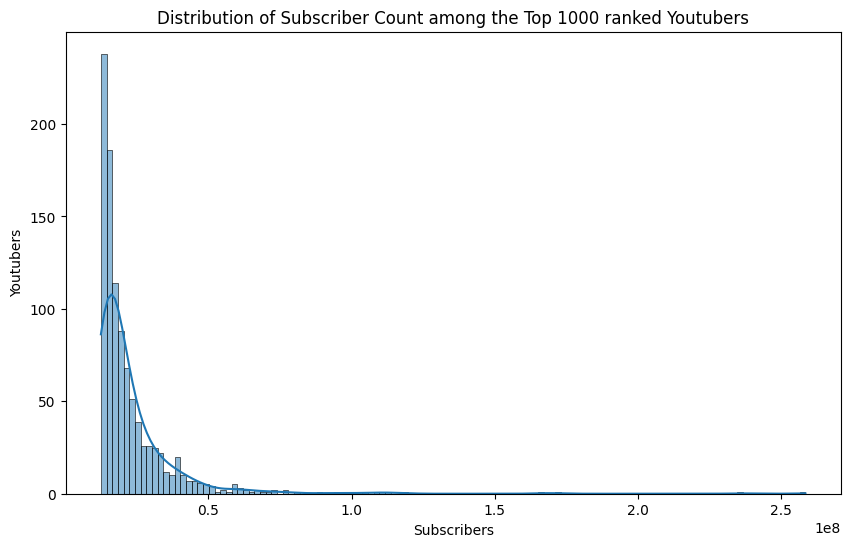

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Subscribers', kde=True)
plt.title('Distribution of Subscriber Count among the Top 1000 ranked Youtubers')
plt.xlabel('Subscribers')
plt.ylabel('Youtubers')
plt.show()

Here we have the barplot of the subscriber count among the Top 1000 ranked youtubers. Subscribers are represented in 100 millions.

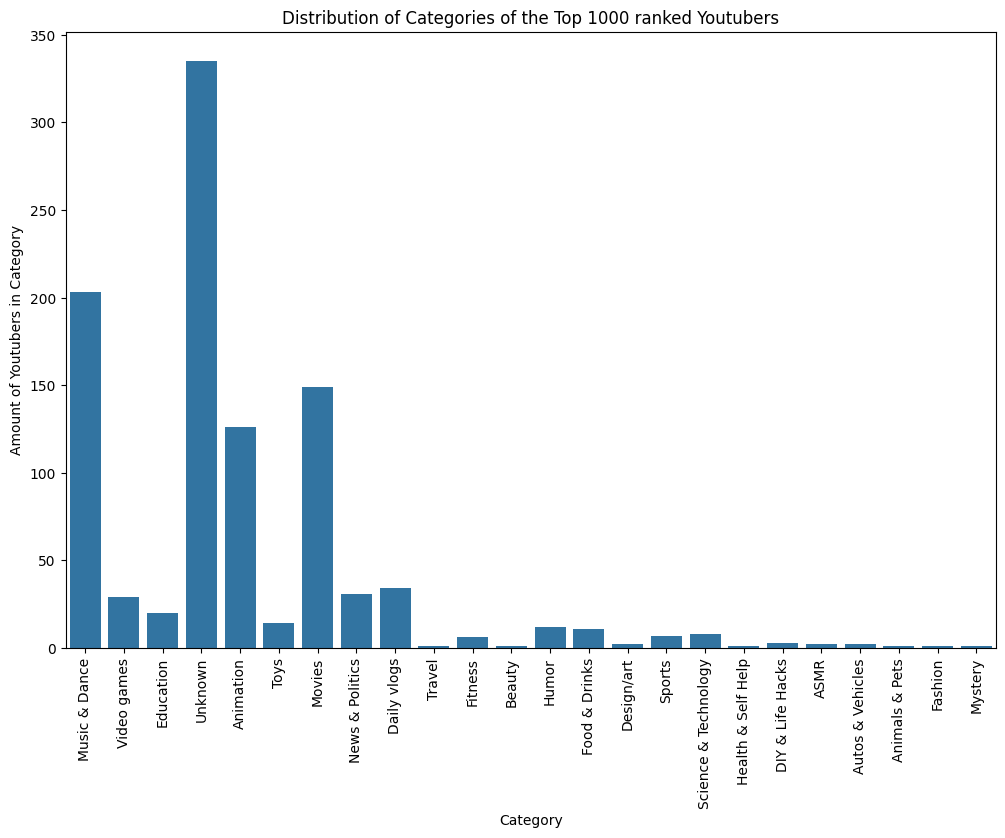

In [24]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Category')
plt.title("Distribution of Categories of the Top 1000 ranked Youtubers")
plt.xlabel('Category')
plt.xticks(rotation=90)
plt.ylabel('Amount of Youtubers in Category')
plt.show()

Here is the barplot of the categories of content from the top 1000 ranked youtubers. The largest category is a little misleading as it is our special category 'Unknown' and therefore most likely includes more than one category. The second highest is 'Music and Dance', which might actually be the category that the most of the top 1000 youtubers created content within. 

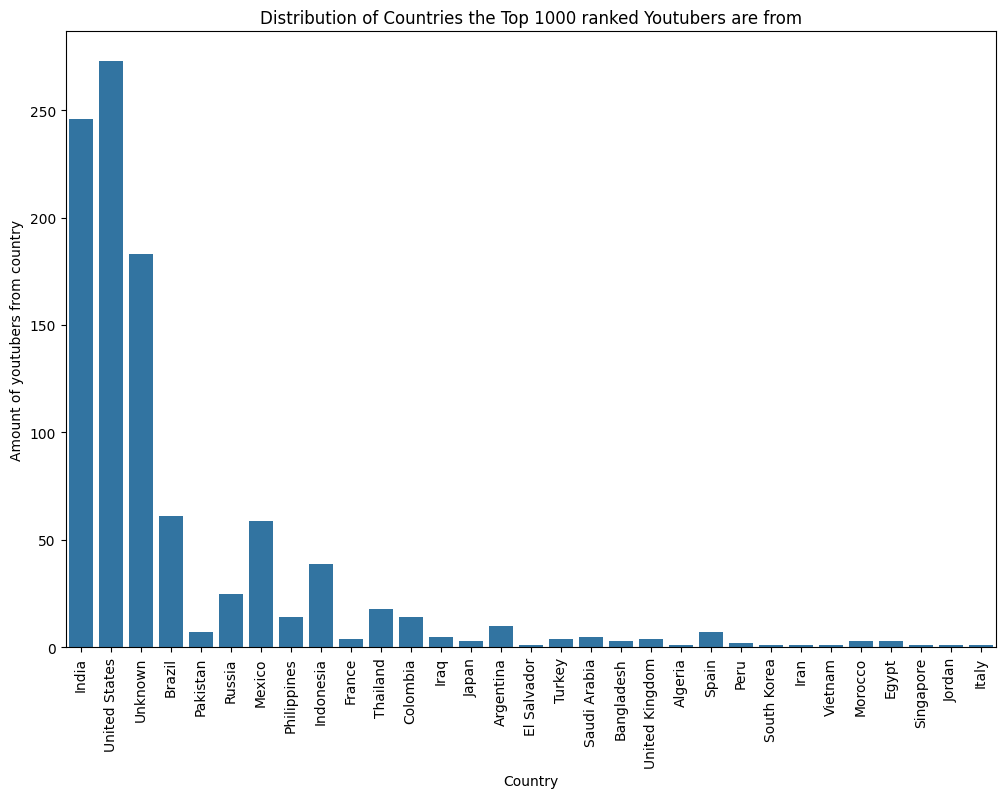

In [25]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Country')
plt.title('Distribution of Countries the Top 1000 ranked Youtubers are from')
plt.xlabel('Country')
plt.xticks(rotation=90)  
plt.ylabel('Amount of youtubers from country')
plt.show()

This is a barplot of the countries that the top 1000 ranked youtubers are from. The largest category is the United States of American, followed closely by India. Then comes our special category 'Unknown', which again most likely includes multilpe countries.

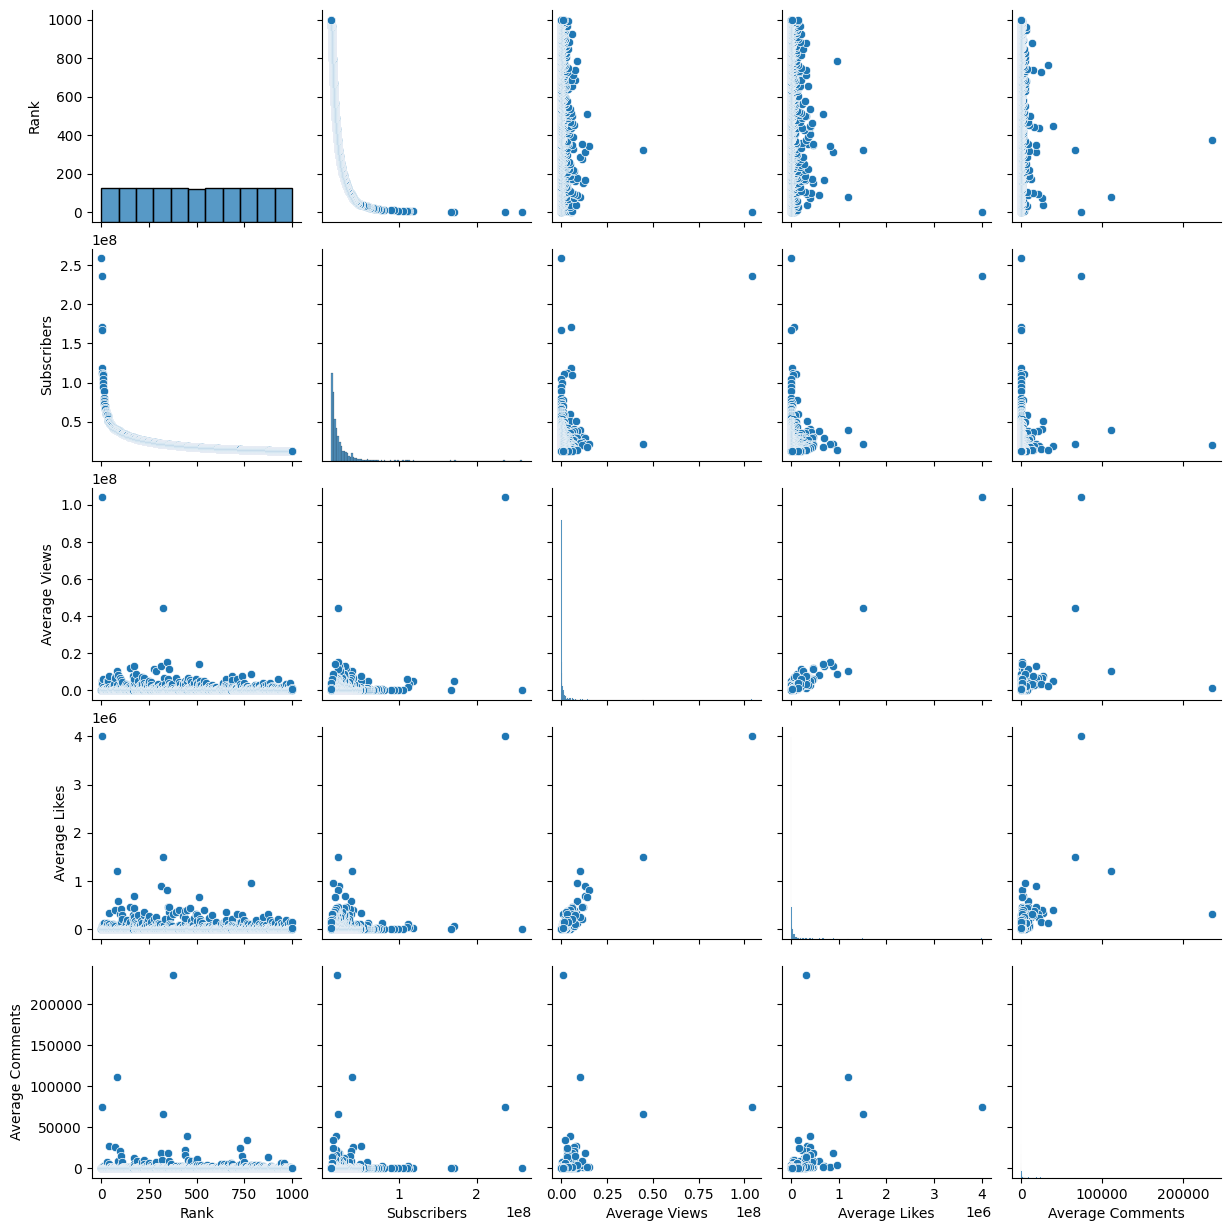

In [26]:
sns.pairplot(df)
plt.show()

## Task 2: Feature Engineering and Descriptive Statistics

##### Task 2.1

We have decided to make some categories for the amount of subscribers. 

From ```df.describe()``` we know that 25 % of the youtubers have less than or equal to 14.6 million subscribers, and 50 % have around 17.7 million, and 75 % have around 24.5 million subscribers. We also know that the minimum of subscribers is 12.5 million in this dataset.
Therefore, we have chosen to make these categoies: '0-15M', '15-20M', '20-50M', '50-100M', '100M+'. 

In [45]:
bins = [12e6, 15e6, 20e6, 50e6, 100e6, 300e6]
labels = ['12-15M', '15-20M', '20-50M', '50-100M', '100M+']

df['Subscriber Ranges'] = pd.cut(df['Subscribers'], bins=bins, labels=labels, right=False)

df

,Rank,Channel Name,Category,Subscribers,Country,Average Views,Average Likes,Average Comments,Subscriber Ranges,Avg Likes Ranges
1,1.0,T-Series,Music & Dance,258400000.0,India,135200.0,5600.0,223.0,100M+,0-10K
2,2.0,MrBeast,Video games,236100000.0,United States,104000000.0,4000000.0,74000.0,100M+,500K+
3,3.0,Cocomelon - Nursery Rhymes,Education,171400000.0,Unknown,5100000.0,57100.0,0.0,100M+,10-100K
4,4.0,SET India,Unknown,167100000.0,India,27900.0,996.0,7.0,100M+,0-10K
5,5.0,✿ Kids Diana Show,Animation,118500000.0,Unknown,5100000.0,14300.0,0.0,100M+,10-100K
...,...,...,...,...,...,...,...,...,...,...
996,996.0,BBC Earth,Unknown,12500000.0,United States,80300.0,1700.0,79.0,12-15M,0-10K
997,997.0,Jamie Nyland,Animation,12500000.0,United States,66700.0,2500.0,104.0,12-15M,0-10K
998,998.0,janin al chair,Unknown,12500000.0,Mexico,1400000.0,146100.0,485.0,12-15M,100-200K
999,999.0,Myke Towers,Music & Dance,12500000.0,Colombia,8300.0,485.0,8.0,12-15M,0-10K


We also want to add some categories for average likes. 

From ```df.describe()``` we know that the minimum value for 'Average Likes' is 0, so our lowest category will be 0 to something. We know that 25 % of the top 1000 ranked youtubers have less than or equal to 527 likes on average. 50 % have around 3800 average likes, and 75 % have around 28150, and we know that the maximum value of average likes is 4 millions. So, we made the categories are '0-1K', '1-5K', '5-10K', '10-50K', '50-100K','100-500K', and '500K+'.

In [48]:
bins = [0, 1e3, 5e3, 1e4, 5e4, 1e5, 5e5, 5e6]
labels = ['0-1K', '1-5K', '5-10K', '10-50K', '50-100K','100-500K','500K+']

df['Avg Likes Ranges'] = pd.cut(df['Average Likes'], bins=bins, labels=labels, right=False)

df

,Rank,Channel Name,Category,Subscribers,Country,Average Views,Average Likes,Average Comments,Subscriber Ranges,Avg Likes Ranges
1,1.0,T-Series,Music & Dance,258400000.0,India,135200.0,5600.0,223.0,100M+,5-10K
2,2.0,MrBeast,Video games,236100000.0,United States,104000000.0,4000000.0,74000.0,100M+,500K+
3,3.0,Cocomelon - Nursery Rhymes,Education,171400000.0,Unknown,5100000.0,57100.0,0.0,100M+,50-100K
4,4.0,SET India,Unknown,167100000.0,India,27900.0,996.0,7.0,100M+,0-1K
5,5.0,✿ Kids Diana Show,Animation,118500000.0,Unknown,5100000.0,14300.0,0.0,100M+,10-50K
...,...,...,...,...,...,...,...,...,...,...
996,996.0,BBC Earth,Unknown,12500000.0,United States,80300.0,1700.0,79.0,12-15M,1-5K
997,997.0,Jamie Nyland,Animation,12500000.0,United States,66700.0,2500.0,104.0,12-15M,1-5K
998,998.0,janin al chair,Unknown,12500000.0,Mexico,1400000.0,146100.0,485.0,12-15M,100-500K
999,999.0,Myke Towers,Music & Dance,12500000.0,Colombia,8300.0,485.0,8.0,12-15M,0-1K


##### Task 2.2

We then calculated the mean, median and standard deviation for 'Subscribers' and 'Average Likes'.

In [49]:
mean_for_subs = df['Subscribers'].mean()
mean_for_likes = df['Average Likes'].mean()

median_for_subs = df['Subscribers'].median()
median_for_likes = df['Average Likes'].median()

std_for_subs = df['Subscribers'].std()
std_for_likes = df['Average Likes'].std()

print(f"Mean of Subscribers: {mean_for_subs}")
print(f"Mean of Avg Likes: {mean_for_likes}")
print(f"Median of Subscribers: {median_for_subs}")
print(f"Median of Avg Likes: {median_for_likes}")
print(f"Standard Deviation of Subscribers: {std_for_subs}")
print(f"Standard Deviation of Avg Likes: {std_for_likes}")

Mean of Subscribers: 22904000.0
Mean of Avg Likes: 44284.905
Median of Subscribers: 17700000.0
Median of Avg Likes: 3800.0
Standard Deviation of Subscribers: 17702815.416584834
Standard Deviation of Avg Likes: 166125.31362707392


We then counted the frequency of each category.

In [51]:
non_float_columns = df.select_dtypes(exclude=['float64'])

for column in non_float_columns.columns:
    print(f"Counts of unique values in {column}:")
    print(df[column].value_counts())
    print("\n")

Counts of unique values in Channel Name:
Channel Name
Rosanna Pansino                           2
DeGoBooM                                  2
Linkin Park                               2
BigTasty                                  2
penguinz0                                 2
                                         ..
Dr. Vivek Bindra: Motivational Speaker    1
Baim Paula                                1
NBA                                       1
طارق الحلبي tarik alhalapi                1
HikakinTV                                 1
Name: count, Length: 994, dtype: int64


Counts of unique values in Category:
Category
Unknown                 335
Music & Dance           203
Movies                  149
Animation               126
Daily vlogs              34
News & Politics          31
Video games              29
Education                20
Toys                     14
Humor                    12
Food & Drinks            11
Science & Technology      8
Sports                    7
Fitness    

Interestingly, some channel names appear more than once. We had expected all channel names would be unique.

We are quite satisfied with the categories 'Subscriber Rangers' and Avg Likes Ranges' that we made. However, if we had to change them, we could choose to combine '50-100M' and '100M+' for 'Subscriber Ranges', since there is only 41 out of the top 1000 ranked youtubers that fall within these categories. 

##### Task 2.3


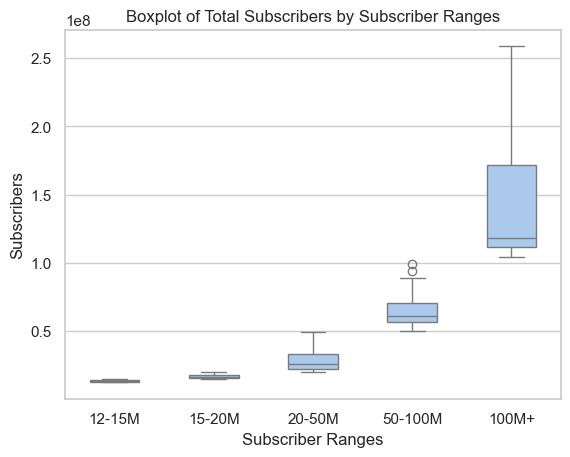

In [52]:
sns.set_theme(style="whitegrid", palette="pastel")
sns.boxplot(x='Subscriber Ranges', y='Subscribers', data=df, width=0.5)
plt.title('Boxplot of Total Subscribers by Subscriber Ranges')
plt.show()

Here is the boxplot of subscribers within the categories of subscriber ranges that we made.

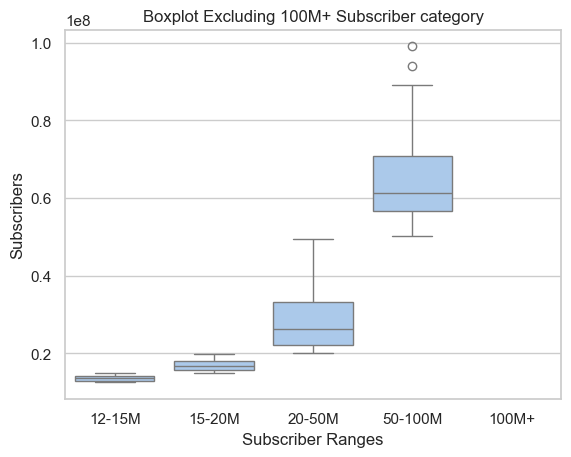

In [53]:
filtered_df = df[df['Subscriber Ranges'] != '100M+']
sns.boxplot(x='Subscriber Ranges', y='Subscribers', data=filtered_df)
plt.title('Boxplot Excluding 100M+ Subscriber category')
plt.show()

We decided to add another boxplot excluding the 100M+ subscriber range to be able to easilier see the other ranges. There are some interesting outliers in the '50-100M' range. 

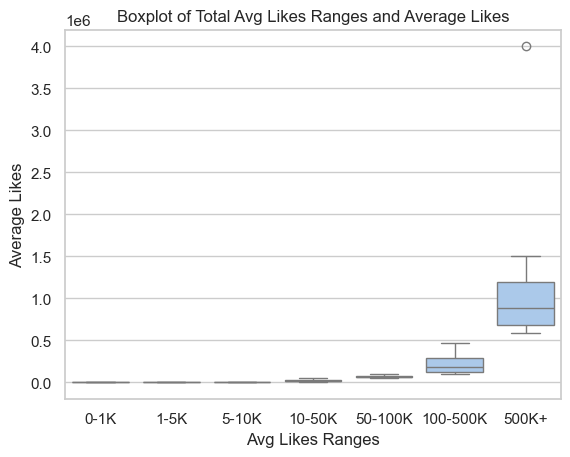

In [54]:
sns.set_theme(style="whitegrid", palette="pastel")
sns.boxplot(x='Avg Likes Ranges', y='Average Likes', data=df)
plt.title('Boxplot of Total Avg Likes Ranges and Average Likes')
plt.show()

Here is the boxplot of average likes within our average likes ranges. We can clearly see the one extreme outlier for 4M 'Average Likes', which was also the maximum amount of 'Average Likes'. We wonder if it might be a mistake in the dataset.

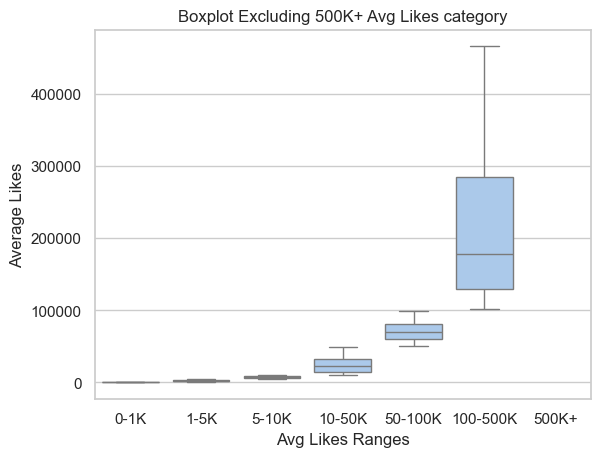

In [55]:
filtered_df = df[df['Avg Likes Ranges'] != '500K+']
sns.boxplot(x='Avg Likes Ranges', y='Average Likes', data=filtered_df)
plt.title('Boxplot Excluding 500K+ Avg Likes category')
plt.show()

Again we chose to create a boxplot excluding the highest range, in this case '500K+', to be able to easier read the other data.

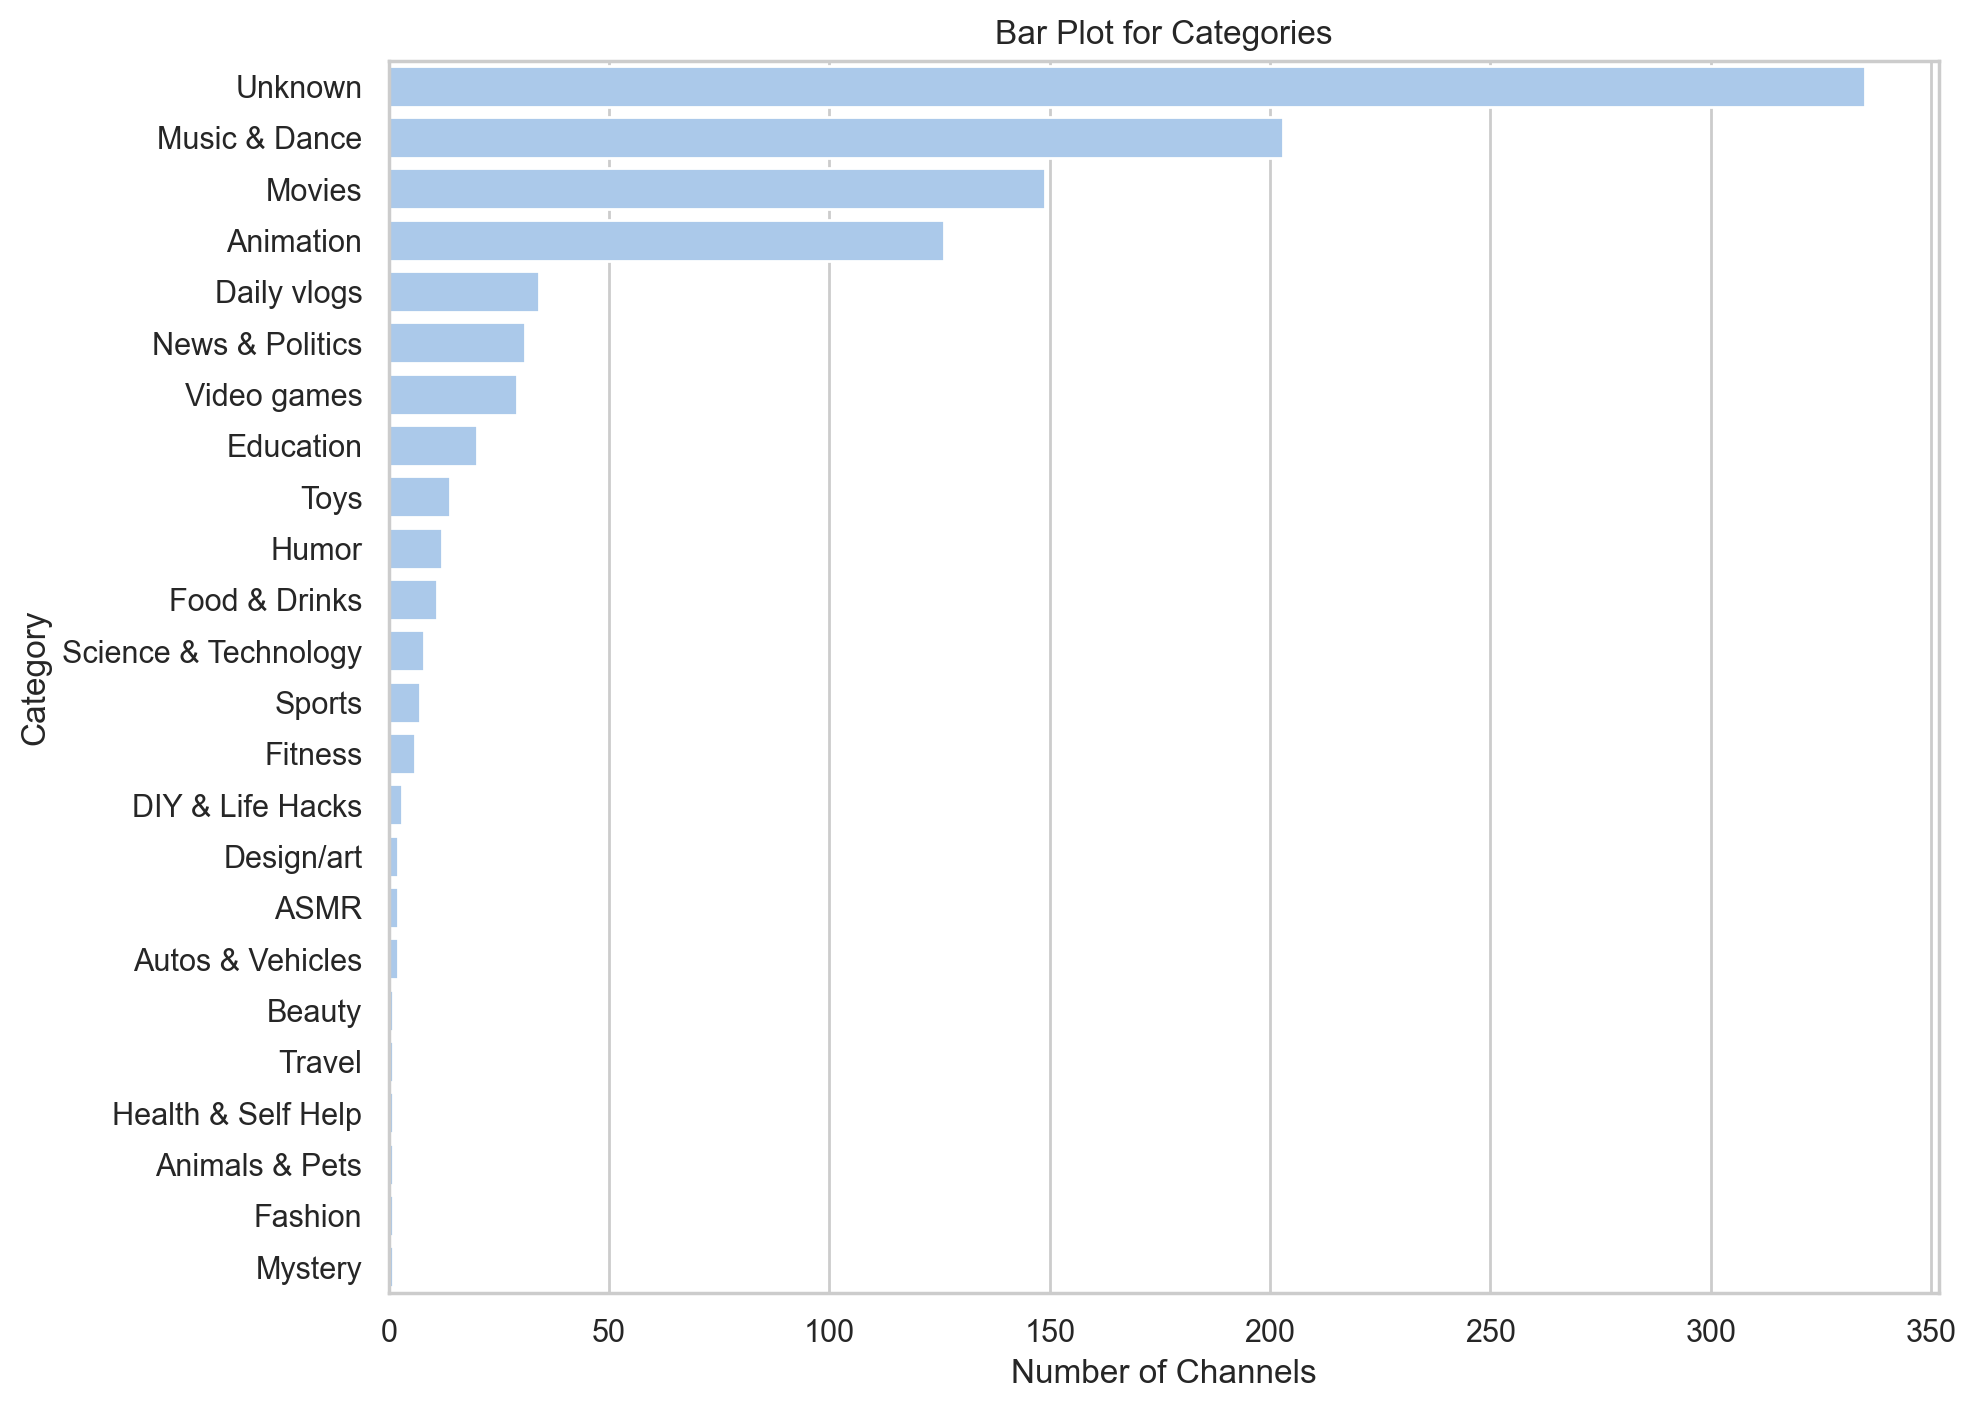

In [35]:
plt.figure(figsize=(10, 8), dpi=200)
category_counts = df['Category'].value_counts()
sns.barplot(x=category_counts.values, y=category_counts.index)
plt.title('Bar Plot for Categories')
plt.xlabel('Number of Channels')
plt.ylabel('Category')
plt.show()

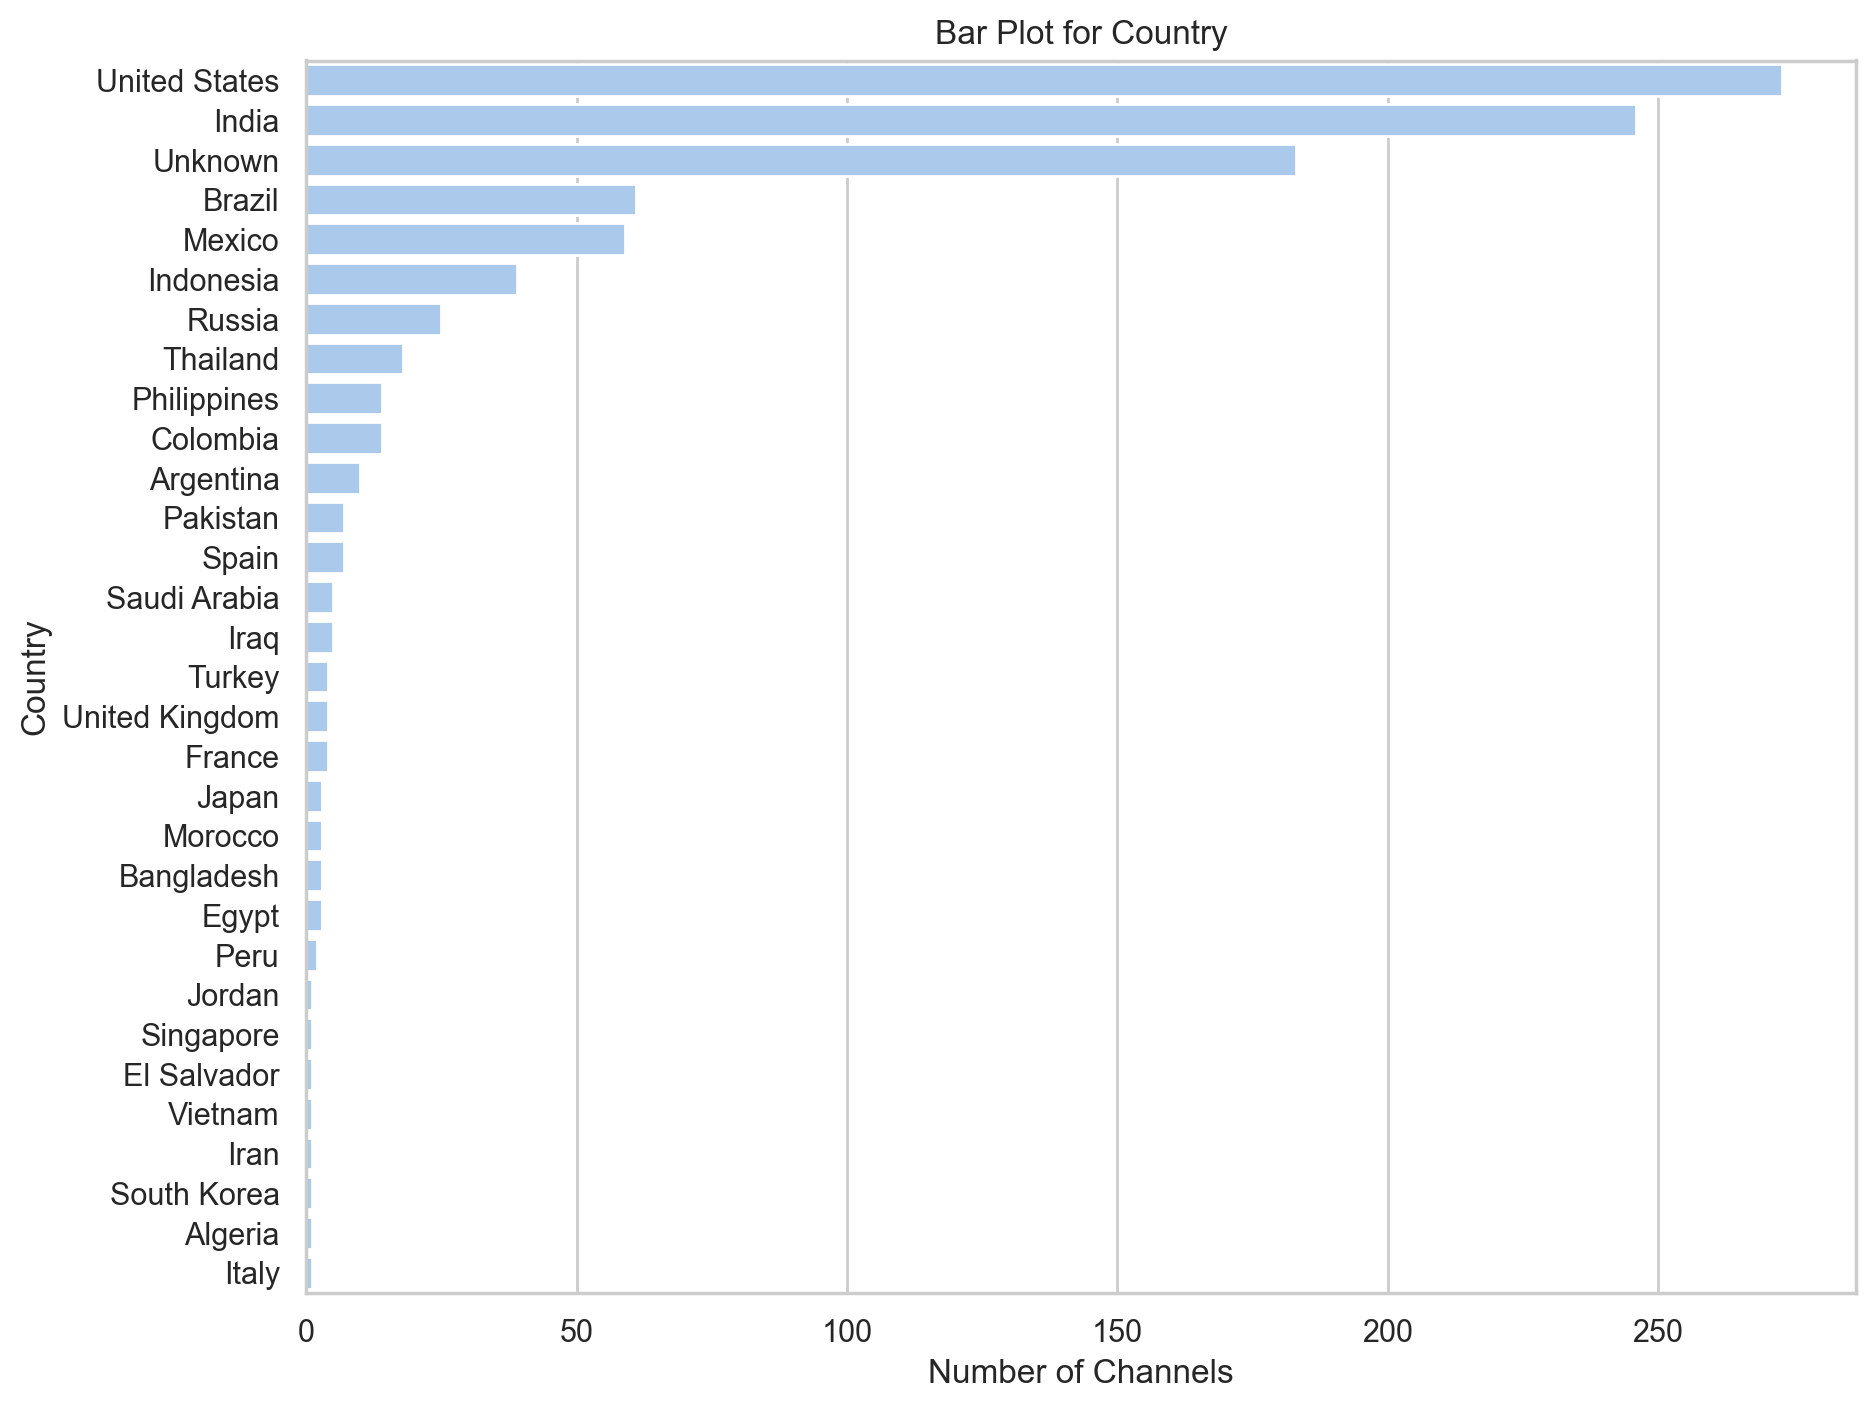

In [36]:
plt.figure(figsize=(10, 8), dpi=200)
content_type_counts = df['Country'].value_counts()
sns.barplot(x=content_type_counts.values, y=content_type_counts.index)
plt.title('Bar Plot for Country')
plt.xlabel('Number of Channels')
plt.ylabel('Country')
plt.show()

## Task 3: Data Wrangling and Analysis

##### Task 3.1

We are interested in finding out if there is any correaltion within each categrory of content that the top 1000 ranked youtubers create content within, and the amount of subscribers and average views that these youtubers get. 

##### Hypothetical question: For every category, is there a correlation between the subscriber count and number of average views?

In [57]:
column_names = ['Category', 'Channel Name', 'Subscribers', 'Average Views']
df_sub_and_views = df[column_names]
df_sub_and_views

,Category,Channel Name,Subscribers,Average Views
1,Music & Dance,T-Series,258400000.0,135200.0
2,Video games,MrBeast,236100000.0,104000000.0
3,Education,Cocomelon - Nursery Rhymes,171400000.0,5100000.0
4,Unknown,SET India,167100000.0,27900.0
5,Animation,✿ Kids Diana Show,118500000.0,5100000.0
...,...,...,...,...
996,Unknown,BBC Earth,12500000.0,80300.0
997,Animation,Jamie Nyland,12500000.0,66700.0
998,Unknown,janin al chair,12500000.0,1400000.0
999,Music & Dance,Myke Towers,12500000.0,8300.0


We create a subset of our dataset only including the columns, we are interested in right now. These columns are 'Category', 'Channel Name', 'Subscribers', and 'Average Views'.

In [58]:
grouped = df_sub_and_views[['Category', 'Subscribers', 'Average Views']].groupby('Category').mean().astype(int)
grouped

,Subscribers,Average Views
Category,,
ASMR,14550000,369200
Animals & Pets,15400000,580800
Animation,22491269,941611
Autos & Vehicles,14900000,732250
Beauty,23900000,942800
DIY & Life Hacks,16233333,29333
Daily vlogs,18005882,903914
Design/art,18250000,2111200
Education,31280000,529185


Then we use ```groupby()``` to group the data by the content categories.

##### Task 3.2

##### Scatter plot

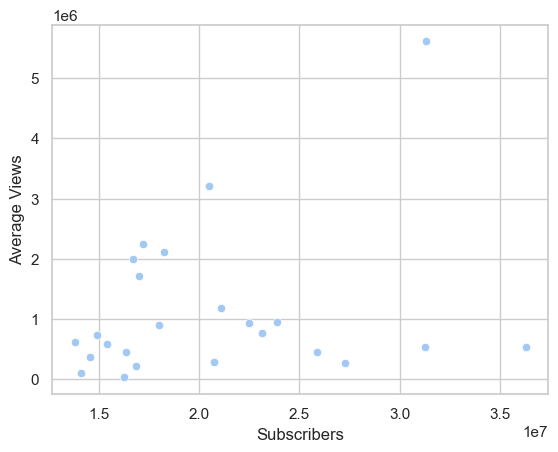

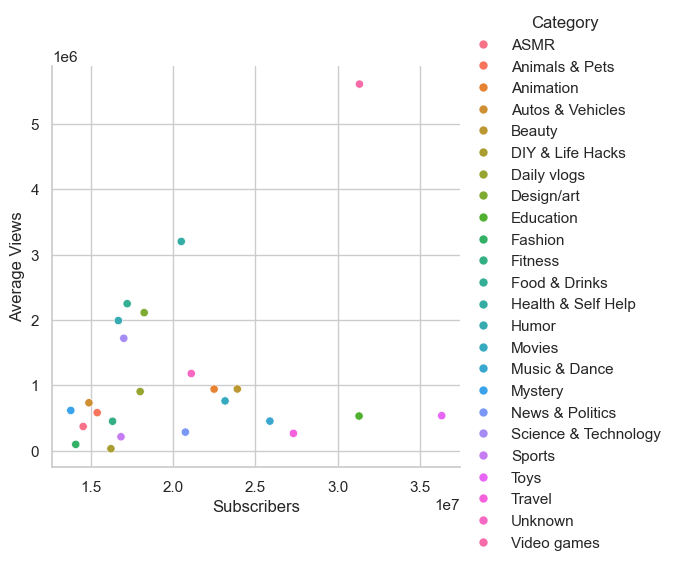

In [39]:
sns.scatterplot(data=grouped, x='Subscribers', y='Average Views')
sns.relplot(data=grouped, x='Subscribers', y='Average Views', hue='Category')
plt.show()

Here is two of the same scatterplot, one with added description of the data points within.

##### Pair plot

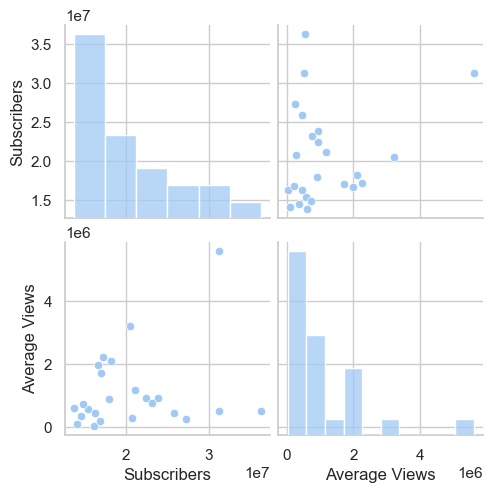

In [40]:
sns.pairplot(grouped)
plt.show()

##### Task 3.3

### Insights:
- Only 4.1% of the top 1000 YouTubers have over 50 million subscribers, showing that reaching such a massive subscriber count is rare.
- Some categories have lots of subscribers, but that doesn't always mean they get lots of views. We didn't find a clear link between subscriber count and average views.
- Using Jupyter with tools like Pandas, Seaborn, and Matplotlib has been really helpful for our data work. It makes analyzing data easier and more efficient.